In [ ]:
import dynamoon as dm
import matplotlib.pyplot as plt

In [ ]:
star = dm.star(1, 1, [0.5, 0.5])
planet = dm.rock(10, 1)
moon = dm.rock(0.5, 0.5)

In [ ]:
t = np.linspace(3.5, 4.5, 100000)
sys = dm.system(star, planet, moon)
sys.set_planet_orbit(t0=4, e=0.0, P=365, Omega=180, w=0, i=90)
sys.set_moon_orbit(t0=0.15, e=0.1, P=28, Omega=80, w=0, i=90)

In [ ]:
%time flux = sys.flux(t)
plt.plot(t, flux, '-')
#plt.xlim(4.26, 4.28)
#plt.axvline(3.9755)

In [ ]:
fig = plt.figure(figsize=(5, 5))
sys.draw_config(fig.gca(), 4.27)
plt.xlim(-1.1, -0.9)
plt.ylim(-0.1, 0.1)

In [ ]:
from IPython.display import HTML

stkwargs = {"fill": True, "color":"#ffbb4d"}
plkwargs = {"fill": True, "color":"#4c89d4", "alpha":1}
mokwargs = {"fill": True, "color":"#ff4a4a", "alpha":1}

animation = sys.animate(np.linspace(3.6, 4.4, 200), 
                        stkwargs=stkwargs, 
                        plkwargs=plkwargs, 
                        mokwargs=mokwargs, duration=5)

HTML(animation.to_html5_video())

In [ ]:
import batman
from astropy import constants as ac

params = batman.TransitParams()
params.t0 = 4                       
params.per = 100                      
params.rp = 1 / sys.star.radius                    
params.a = sys.starplanet.a * ac.au.value / (sys.star.radius * ac.R_earth.value)
params.inc = 90                     
params.ecc = 0.2                     
params.w = 180                       
params.u = [0.5, 0.5]                
params.limb_dark = "quadratic"       

In [ ]:
%time m = batman.TransitModel(params, t)    
%time flux_batman = m.light_curve(params)          

In [ ]:
plt.plot(t, flux_batman, color='k')
plt.plot(t, flux+1)
plt.xlim(3, 5)

In [ ]:
plt.plot(t, ((flux+1) - flux_batman)*1e6)
plt.xlim(3, 5)
plt.ylim(-2, 1)

In [ ]:
plt.plot(flux_batman)

In [ ]:
0.003216 / 0.005202

In [ ]:
bb = 0.0
Tb = 13
ep = 0.01
P = 365 * 24 
i = 90 * np.pi / 180
np.sqrt(1 - bb**2) / np.sin(Tb * np.pi / P * np.sqrt(1 - ep**2)) / np.sin(i)

In [ ]:
ac.au.value / ac.R_sun.value

In [1]:
import dynamoon as dm
import matplotlib.pyplot as plt

taub = 4
rp = ac.R_earth.value / ac.R_sun.value
Tb = 13
bb = 0.0
mm = 0.012
rm = 0.25 * rp
bm = 0.1
emcosw = 0.0
emsinw = 0.0
omegam = 0.0
u1 = 0.5
u2 = 0.5
Pm = 28
sys = dm.system.from_fitting_params(taub, rp, Tb, bb, mm, rm, bm, Pm, emcosw, emsinw, omegam, u1, u2)

taub:  4 eb:  0.0 P:  8780.719807128566 wb:  0.0 ib:  90.0 
em:  0.0 Pm:  28 Omegam:  0.0 wm:  0.0 im:  89.79537178101417


In [ ]:
np.arccos(43)

CPU times: user 21.8 ms, sys: 2.82 ms, total: 24.6 ms
Wall time: 27.9 ms


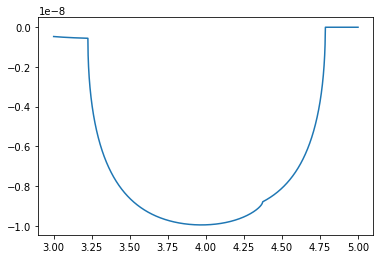

In [2]:
t = np.linspace(2, 5, 10000)
%time flux = sys.flux(t)
plt.plot(t, flux, '-')

In [ ]:
from IPython.display import HTML

stkwargs = {"fill": True, "color":"#ffbb4d"}
plkwargs = {"fill": True, "color":"#4c89d4", "alpha":1}
mokwargs = {"fill": True, "color":"#ff4a4a", "alpha":1}

animation = sys.animate(np.linspace(3, 5, 200), 
                        stkwargs=stkwargs, 
                        plkwargs=plkwargs, 
                        mokwargs=mokwargs, duration=5)

HTML(animation.to_html5_video())

In [ ]:
np.sqrt(emcosw**2 + emsinw**2)